In [1]:
import sys
from ete3 import Tree, TreeStyle, NodeStyle, faces, AttrFace


In [2]:

# Creates a tree
file="treeBombus.dnd"

try:
    f=open(file, 'r')
except IOError:
    print ("Unknown file: "+file)
    sys.exit()

line = ""
for l in f:
    line += l.strip()
    
f.close()

t = Tree( line )

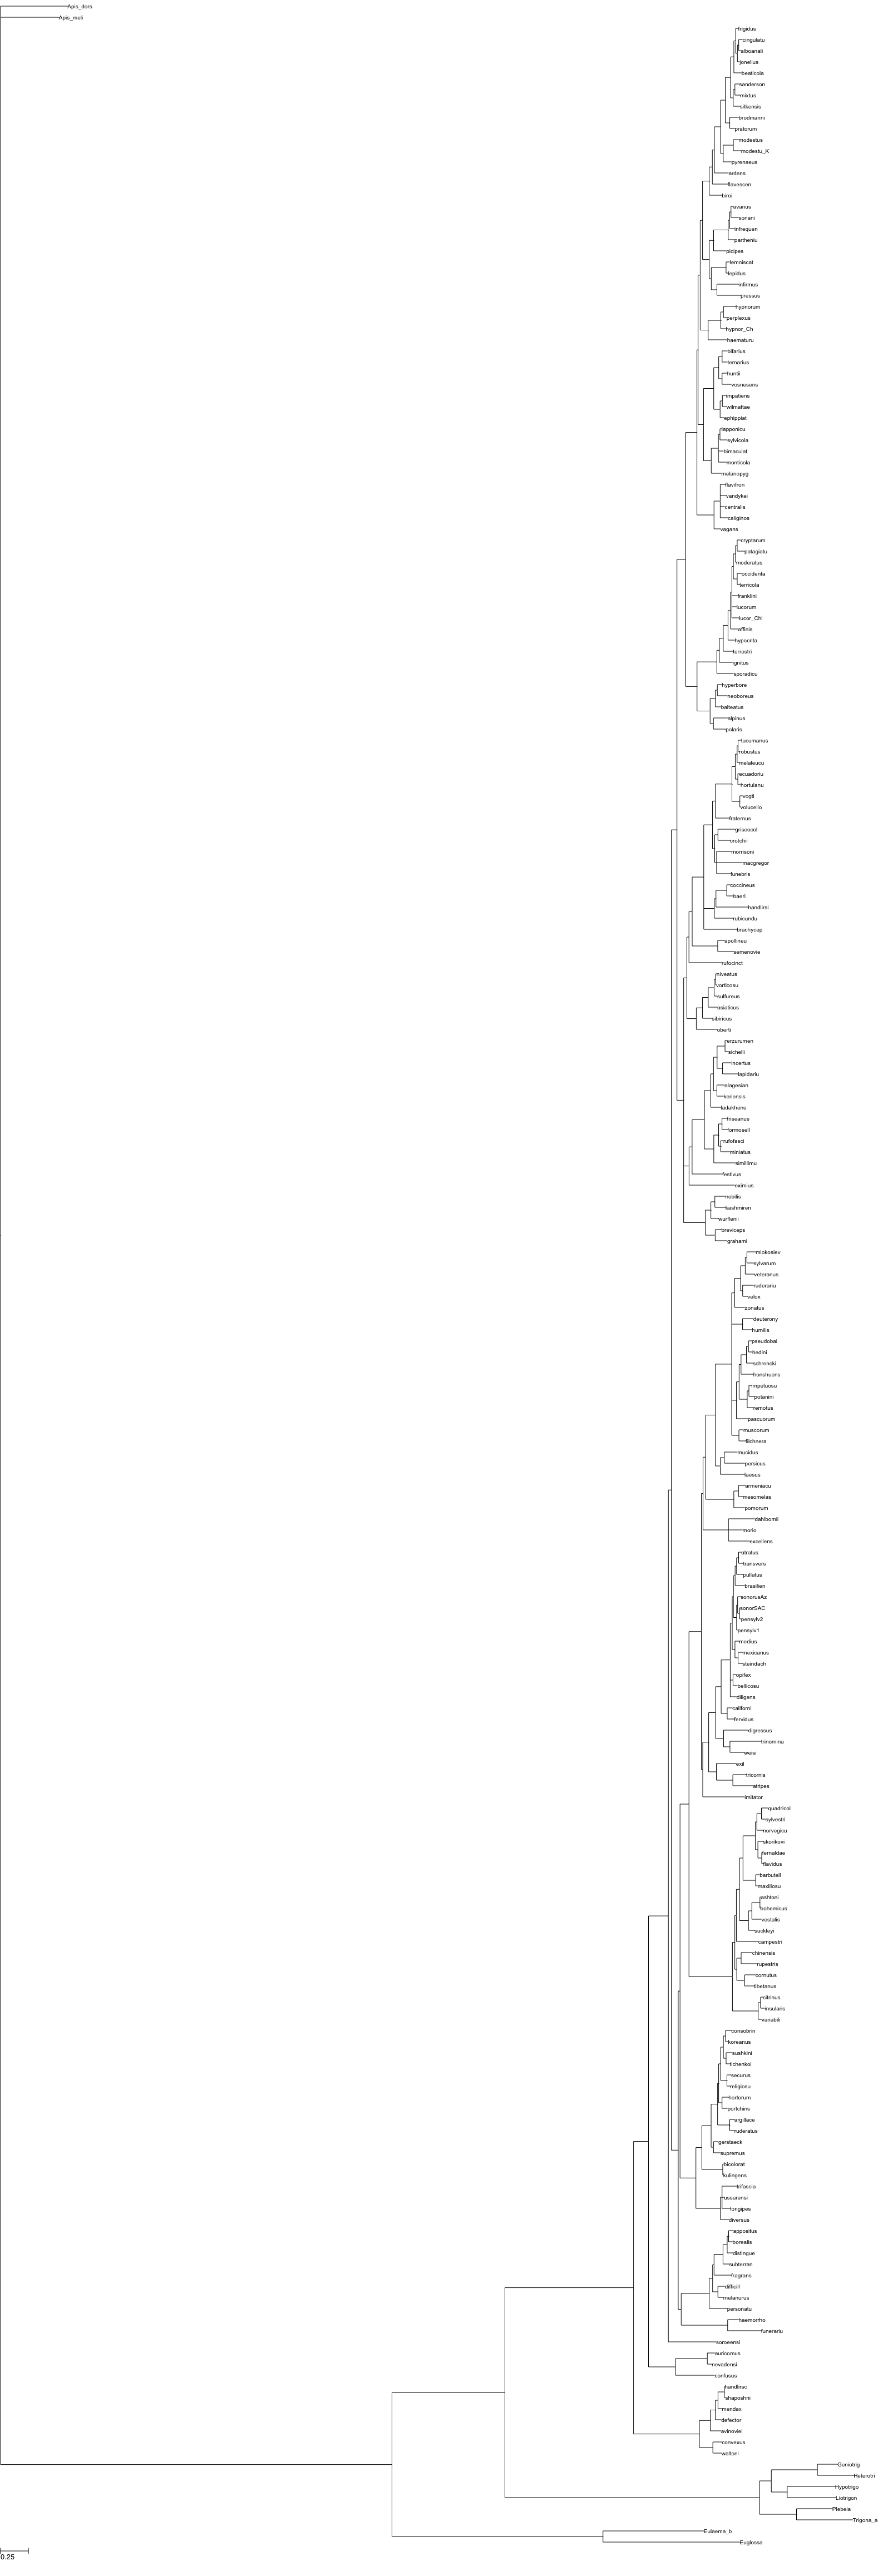

In [3]:
# Initial plot
ts = TreeStyle()
ts.min_leaf_separation= 0
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches
ts.scale = 200 
nstyle = NodeStyle()
nstyle["size"] = 0
for n in t.traverse():
   n.set_style(nstyle)
t.render("%%inline", tree_style=ts)

## Plot with images at the tips

Species Apis_dors has no image associated
Species Apis_meli has no image associated
Species alboanali has no image associated
Species modestu_K has no image associated
Species hypnor_Ch has no image associated
Species sylvicola has no image associated
Species cryptarum has no image associated
Species moderatus has no image associated
Species occidenta has no image associated
Species lucor_Chi has no image associated
Species handlirsi has no image associated
Species apollineu has no image associated
Species vorticosu has no image associated
Species erzurumen has no image associated
Species sichelli has no image associated
Species alagesian has no image associated
Species eximius has no image associated
Species potanini has no image associated
Species sonorusAz has no image associated
Species sonorSAC has no image associated
Species pensylv2 has no image associated
Species pensylv1 has no image associated
Species californi has no image associated
Species bohemicus has no image associated

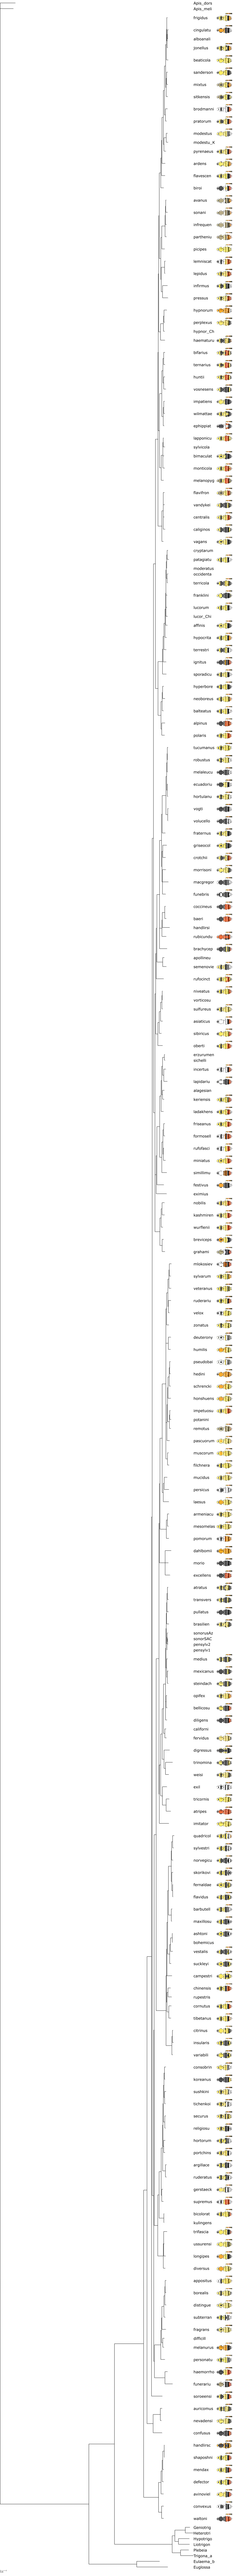

In [4]:
# First, construct the map between leaf and image 
import os.path

direc = "PAWimages_CorrespondToTree"
listOfImages = os.listdir(direc)
#for im in listOfImages:
#    print(im)

def findImage(map, listOfImages, direc, name):
    for im in listOfImages:
        if im.startswith(name):
            map[name] = os.path.join(direc,im)
            return True
    return False

map = dict()
for leaf in t.iter_leaves():
    if (findImage(map, listOfImages, direc, leaf.name)):
        pass
    else:
        print("Species "+leaf.name+ " has no image associated")      
print("\n\tFound images for " + str(len(map)) + " species.")


def mylayout(node):
    # If node is a leaf, add the image
    if node.is_leaf():
        N = AttrFace("name", fsize=30)
        faces.add_face_to_node(N, node, column=0, position="aligned", aligned=True)
        if node.name in map:
            #print("found "+node.name)
            leafFace = faces.ImgFace(map[node.name], width=150)
            faces.add_face_to_node(leafFace, node, column=1, aligned=True)
    #If node is an internal node
    else:
        pass

ts = TreeStyle()
ts.min_leaf_separation= 0
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches
ts.scale = 200
ts.show_leaf_name = False
nstyle = NodeStyle()
nstyle["size"] = 0
for n in t.traverse():
   n.set_style(nstyle)
ts.layout_fn = mylayout
t.render("%%inline", w=900, tree_style = ts)


### No branch lengths

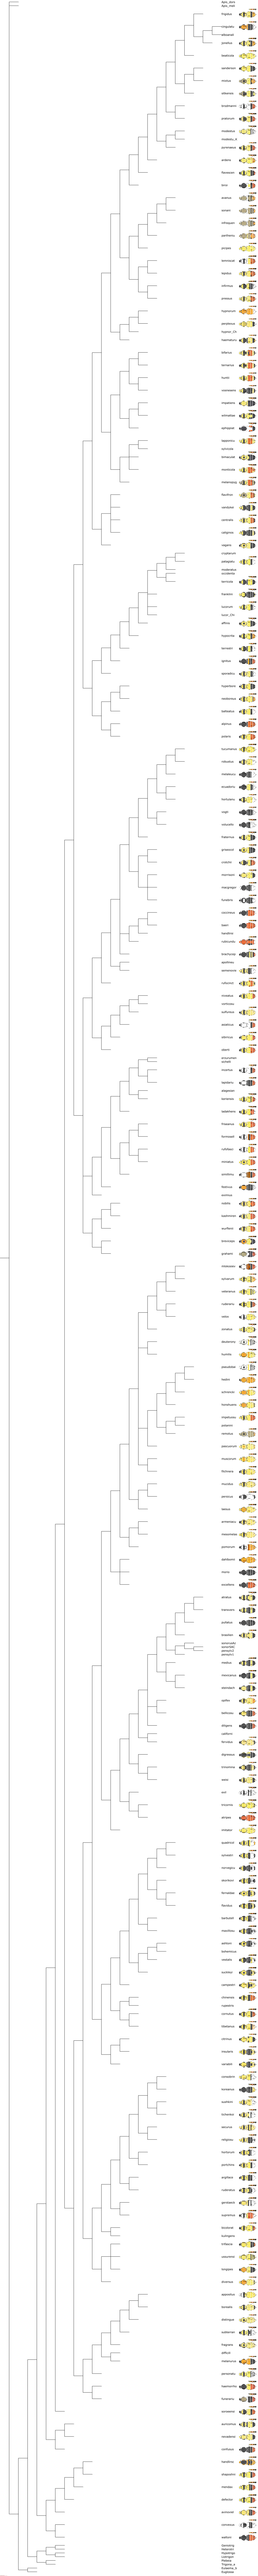

In [7]:

def mylayout(node):
    # If node is a leaf, add the image
    if node.is_leaf():
        N = AttrFace("name", fsize=60)
        faces.add_face_to_node(N, node, column=0, position="aligned", aligned=True)
        if node.name in map:
            #print("found "+node.name)
            leafFace = faces.ImgFace(map[node.name], width=450)
            faces.add_face_to_node(leafFace, node, column=1, aligned=True)
    #If node is an internal node
    else:
        pass


ts = TreeStyle()
ts.min_leaf_separation= 0
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches
ts.scale = 200
ts.force_topology = True  # No branch lengths
ts.show_leaf_name = False
nstyle = NodeStyle()
nstyle["size"] = 0
nstyle["vt_line_width"] = 5
nstyle["hz_line_width"] = 5

for n in t.traverse():
   n.set_style(nstyle)
ts.layout_fn = mylayout
t.render("%%inline", w=900, tree_style = ts)
